In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

(0.0, 3.0)

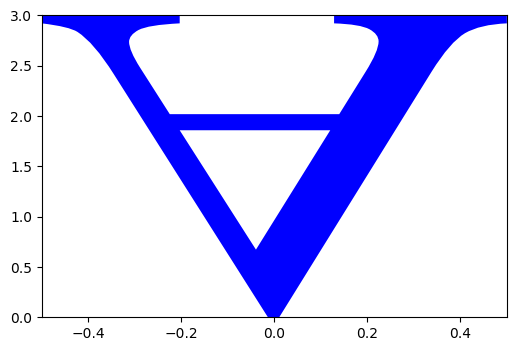

In [8]:
from matplotlib.transforms import Affine2D, Bbox
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties

# Set character to draw
char = 'A'
flip = True

# Create decired bounding box for final character path
ymin = 0.0
xmin = -0.5
height = 3.0
width = 1.0
my_bbox = Bbox.from_bounds(xmin,ymin,width,height)

# Create font properties
# font_name = character.validate_font('Comic Sans MS')
# font_file = character.FONT_FILE_DICT[font_name]
# font_properties = FontProperties(fname=font_file)

font_properties = FontProperties(family='Times New Roman', weight='normal')

# Create figure and axes object
fig, ax = plt.subplots()

# Create temporary character path object
tmp_path = TextPath((0,0), char, size=1, prop=font_properties)

# If need to flip character, do it within tmp_path
if flip:
    transformation = Affine2D().scale(sx=1, sy=-1)
    tmp_path = transformation.transform_path(tmp_path)

# Get bounding box for temporary character path
tmp_bbox = tmp_path.get_extents()

# THIS IS THE KEY TRANSFORMATION
# 1. Translate character path so that lower left corner is at origin
# 2. Scale character path to desired width and height
# 3. Translate character path to desired position
transformation = Affine2D()\
                    .translate(-tmp_bbox.xmin, -tmp_bbox.ymin)\
                    .scale(sx=my_bbox.width/tmp_bbox.width, sy=my_bbox.height/tmp_bbox.height)\
                    .translate(my_bbox.xmin,my_bbox.ymin)
my_path = transformation.transform_path(tmp_path)

# Scale to desired height and width
patch = PathPatch(my_path, facecolor='blue', edgecolor='none')
ax.add_patch(patch)
ax.set_xlim([my_bbox.xmin,my_bbox.xmax])
ax.set_ylim([my_bbox.ymin,my_bbox.ymax])


In [13]:
my_bbox = Bbox([[xmin,ymin],[xmin+width,ymin+height]])
my_bbox

Bbox([[-0.5, 0.0], [0.5, 3.0]])

In [4]:
bbox.height

NameError: name 'bbox' is not defined

In [ ]:
bbox.ymin

In [ ]:
bbox.width

In [ ]:
type(bbox)